Data Prep with Pandas

In [51]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [52]:
csv_path = 'db_1_min_second_two_weeks.csv'

This tutorial will just deal with **hourly predictions**, so start by sub-sampling the data from 10-minute intervals to one-hour intervals:

In [53]:
cols = ['ReceivedTime', 'Kessel', 'Ruecklauf', 'Abgas', 'Puffer_Oben', 'Puffer_Unten', 'Betriebsphase_Kessel', 'Aussen',
        'Vorlauf_HK1_Ist', 'Vorlauf_HK1_Soll', 'Betriebsphase_HK1', 'Vorlauf_HK2_Ist', 'Vorlauf_HK2_Soll', 'Betriebsphase_HK2', 'Boiler_1']
df = pd.read_csv(csv_path, usecols=cols)

df

,ReceivedTime,Kessel,Ruecklauf,Abgas,Puffer_Oben,Puffer_Unten,Betriebsphase_Kessel,Aussen,Vorlauf_HK1_Ist,Vorlauf_HK1_Soll,Betriebsphase_HK1,Vorlauf_HK2_Ist,Vorlauf_HK2_Soll,Betriebsphase_HK2,Boiler_1
0,2021-09-24 00:00:49,72.9,67.3,65,75.6,71.1,0,14.8,24.2,32.3,0,28.2,30.9,0,54.4
1,2021-09-24 00:01:48,72.9,66.7,65,75.6,71.1,0,14.8,24.2,32.3,0,28.4,30.9,0,54.4
2,2021-09-24 00:02:53,72.8,66.7,65,75.6,71.1,0,14.8,24.2,32.3,0,28.2,30.9,0,54.4
3,2021-09-24 00:03:52,73.1,67.2,65,75.6,71.1,0,14.8,24.2,32.3,0,28.2,30.9,0,54.4
4,2021-09-24 00:04:51,72.9,67.3,65,75.6,71.1,0,14.8,24.2,32.3,0,28.2,30.9,0,54.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20143,2021-10-07 23:55:07,25.1,21.3,13,46.8,30.3,0,11.7,26.7,39.2,0,24.6,34.0,0,50.0
20144,2021-10-07 23:56:06,25.1,21.3,13,46.8,30.3,0,11.7,26.9,39.2,0,24.8,34.0,0,50.0
20145,2021-10-07 23:57:11,25.1,21.3,13,46.8,30.3,0,11.7,26.7,39.2,0,24.6,34.0,0,50.0
20146,2021-10-07 23:58:10,25.1,21.3,13,46.8,30.3,0,11.7,26.6,39.2,0,24.6,34.0,0,50.0


In [54]:
date_time = pd.to_datetime(df.pop('ReceivedTime'))

Let's take a glance at the data. Here are the first few rows:

In [55]:
df.head()

,Kessel,Ruecklauf,Abgas,Puffer_Oben,Puffer_Unten,Betriebsphase_Kessel,Aussen,Vorlauf_HK1_Ist,Vorlauf_HK1_Soll,Betriebsphase_HK1,Vorlauf_HK2_Ist,Vorlauf_HK2_Soll,Betriebsphase_HK2,Boiler_1
0,72.9,67.3,65,75.6,71.1,0,14.8,24.2,32.3,0,28.2,30.9,0,54.4
1,72.9,66.7,65,75.6,71.1,0,14.8,24.2,32.3,0,28.4,30.9,0,54.4
2,72.8,66.7,65,75.6,71.1,0,14.8,24.2,32.3,0,28.2,30.9,0,54.4
3,73.1,67.2,65,75.6,71.1,0,14.8,24.2,32.3,0,28.2,30.9,0,54.4
4,72.9,67.3,65,75.6,71.1,0,14.8,24.2,32.3,0,28.2,30.9,0,54.4


Here is the evolution of a few features over time:

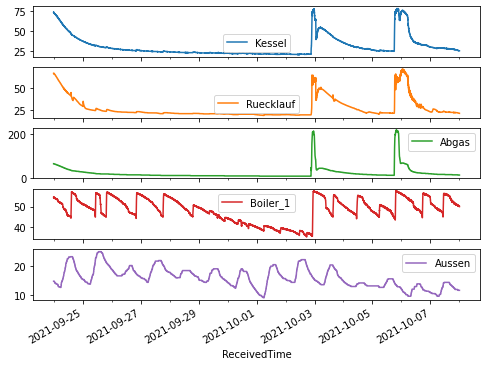

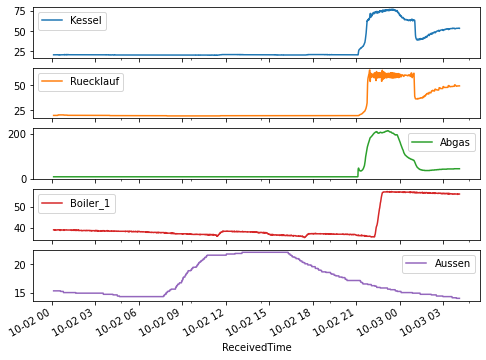

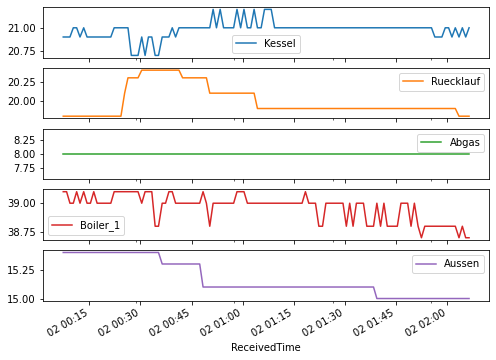

In [56]:
plot_cols = ['Kessel', 'Ruecklauf', 'Abgas', 'Boiler_1', 'Aussen']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

# data is from 2021-09-24 to 2021-10-08

# plot from 28h after 10-02
plot_features = df[plot_cols][8 * 24 * 60:8 * 24 * 60 + 28 * 60]
plot_features.index = date_time[8 * 24 * 60:8 * 24 * 60 + 28 * 60]
_ = plot_features.plot(subplots=True)

# plot from 2h after 10-02
plot_features = df[plot_cols][8 * 24 * 60:8 * 24 * 60 + 2 * 60]
plot_features.index = date_time[8 * 24 * 60:8 * 24 * 60 + 2 * 60]
_ = plot_features.plot(subplots=True)

In [57]:
cols_to_smooth = ['Kessel', 'Ruecklauf', 'Abgas', 'Puffer_Oben', 'Puffer_Unten', 'Aussen',
        'Vorlauf_HK1_Ist', 'Vorlauf_HK1_Soll', 'Vorlauf_HK2_Ist', 'Vorlauf_HK2_Soll', 'Boiler_1']

# smooth out to 5-min windows
df[cols_to_smooth] = df[cols_to_smooth].rolling(window=15).mean()

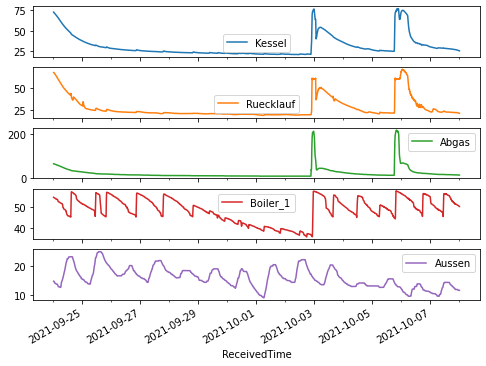

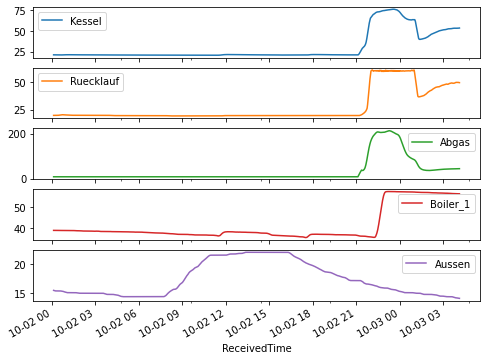

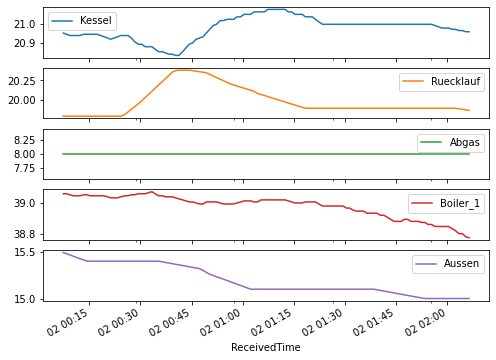

In [58]:
plot_cols = ['Kessel', 'Ruecklauf', 'Abgas', 'Boiler_1', 'Aussen']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

# data is from 2021-09-24 to 2021-10-08

# plot from 28h after 10-02
plot_features = df[plot_cols][8 * 24 * 60:8 * 24 * 60 + 28 * 60]
plot_features.index = date_time[8 * 24 * 60:8 * 24 * 60 + 28 * 60]
_ = plot_features.plot(subplots=True)

# plot from 2h after 10-02
plot_features = df[plot_cols][8 * 24 * 60:8 * 24 * 60 + 2 * 60]
plot_features.index = date_time[8 * 24 * 60:8 * 24 * 60 + 2 * 60]
_ = plot_features.plot(subplots=True)

### Inspect and cleanup

Next, look at the statistics of the dataset:

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Kessel,748995.0,30.283549,13.550456,15.7,22.7,25.1,31.2,87.5
Ruecklauf,748995.0,26.087597,11.953893,12.4,19.9,21.9,25.4,83.9
Abgas,748995.0,24.637824,38.862003,0.0,10.0,13.0,20.0,245.0
Puffer_Oben,748995.0,51.009302,14.685839,22.4,40.5,50.0,62.8,87.7
Puffer_Unten,748995.0,36.571033,9.614981,16.5,29.4,35.1,42.6,84.2
Betriebsphase_Kessel,748995.0,0.129575,0.555078,0.0,0.0,0.0,0.0,8.0
Aussen,748995.0,14.005389,8.037921,-5.4,7.4,14.1,20.1,34.9
Vorlauf_HK1_Ist,748995.0,28.488261,6.043490,16.3,24.2,27.2,31.6,60.0
Vorlauf_HK1_Soll,748995.0,34.913041,6.405410,10.0,32.3,35.3,40.0,40.0
Betriebsphase_HK1,748995.0,0.481318,1.130370,0.0,0.0,0.0,1.0,7.0


#### Time

Similarly, the `Date Time` column is very useful, but not in this string form. Start by converting it to seconds:

In [8]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

Similar to the wind direction, the time in seconds is not a useful model input. Being dependant on the weather, it has clear daily and yearly periodicity. Also, when applying Fast Fourier Transform as described below (was later on in the tutorial) we can see that there's also features with a weekly periodicity, namely Boiler_1. Also 6h and 12h periodicy for HK1 & 2 - Ist & Soll. Nothing for Betriebsphasen. Puffers have periodicity at month, week and day.
Also, one thing I've not been able to see in this FFT but is visible when plotting all the data we have, there is clearly periodicity for seasons. Look at the difference from October through May to the rest. That would indicate a 8-4 month periodicity and I'm not sure how to best capture that so for now I'll just ignore it.

There are many ways you could deal with periodicity.

You can get usable signals by using sine and cosine transforms to clear "Time of day" and "Time of year" signals.
We're doing that for Year, Month, Week, Day, 12h and 6h. May be too much idk but it would make sense from the analytics.

If you don't have that information, you can determine which frequencies are important by extracting features with <a href="https://en.wikipedia.org/wiki/Fast_Fourier_transform" class="external">Fast Fourier Transform</a>. To check the assumptions, here is the `tf.signal.rfft` of the temperature over time. Peaks are important.

In [9]:
fft = tf.signal.rfft(df['Kessel'])
f_per_dataset = np.arange(0, len(fft))

n_samples_min = len(date_time)
min_per_year = 60*24*365.2524
years_per_dataset = n_samples_min/(min_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 2000000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 12, 52.179, 365.2524, 365.2524 * 2, 365.2524 * 4], labels=['1/Year', '1/Month', '1/Week', '1/day', '1/12h', '1/6h'])
_ = plt.xlabel('Frequency (log scale)')

2021-12-13 16:57:34.256709: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 16:57:34.296422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 16:57:34.296635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 16:57:34.297418: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
hour = 60*60
day = 24*hour
week = 7 * day
month = (30.4375) * day
year = (365.2425) * day

def add_sin_and_cos_timestamp(label, interval):
    df[f'{label} sin'] = np.sin(timestamp_s * (2 * np.pi / interval))
    df[f'{label} cos'] = np.cos(timestamp_s * (2 * np.pi / interval))

add_sin_and_cos_timestamp('6h', 6 * hour)
add_sin_and_cos_timestamp('12h', 12 * hour)
add_sin_and_cos_timestamp('Day', day)
add_sin_and_cos_timestamp('Week', week)
add_sin_and_cos_timestamp('Month', month)
add_sin_and_cos_timestamp('Year', year)

In [ ]:
plt.plot(np.array(df['Day sin'])[:(25*60)])
plt.plot(np.array(df['Day cos'])[:(25*60)])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

This gives the model access to the most important frequency features. Still not sure if this is the best or even a good way tho

### Split the data

You'll use a `(70%, 20%, 10%)` split for the training, validation, and test sets. Note the data is **not** being randomly shuffled before splitting. This is for two reasons:

1. It ensures that chopping the data into windows of consecutive samples is still possible.
2. It ensures that the validation/test results are more realistic, being evaluated on the data collected after the model was trained.

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

### Normalize the data

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. That's not the focus of this tutorial, and the validation and test sets ensure that you get (somewhat) honest metrics. So, in the interest of simplicity this tutorial uses a simple average.

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

Now, peek at the distribution of the features. Some features do have long tails, but there are no obvious errors like the `-9999` wind velocity value.

However, I see that Betriebsphase_Kessel has a very long tail, more than double the others. Maybe this means it's better to drop it even though it should have a direct correlation to Kessel?

In [ ]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)